In [8]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

import os
import cv2
import PIL
import numpy as np
from PIL import Image

import torch
import torch.nn.functional as F
import torchvision.models as models
from torchvision import transforms
from torchvision.utils import make_grid, save_image

import matplotlib.pyplot as plt

from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp

device = 'cuda' if torch.cuda.is_available() else 'cpu'

from ultralytics import YOLO

#https://github.com/rigvedrs/YOLO-V8-CAM/blob/main/YOLO%20v8n%20EigenCAM.ipynb

In [11]:
model = YOLO("/Users/emy016/Dropbox/Postdoc2/Kurs/NORA summer school 2023/NORAprosjekt/forams4-1280-augmentedraw-bigtest-200epochs-yolov8x.pt")

rgb_img = cv2.imread("/Users/emy016/Dropbox/Postdoc2/Kurs/NORA summer school 2023/NORAprosjekt/samples/agglutinated.jpg")



FileNotFoundError: [Errno 2] No such file or directory (originated from sysctl(HW_CPU_FREQ))


0: 224x224 golden_retriever 0.41, Labrador_retriever 0.30, Great_Pyrenees 0.09, kuvasz 0.04, cocker_spaniel 0.03, 8.8ms
Speed: 0.9ms preprocess, 8.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


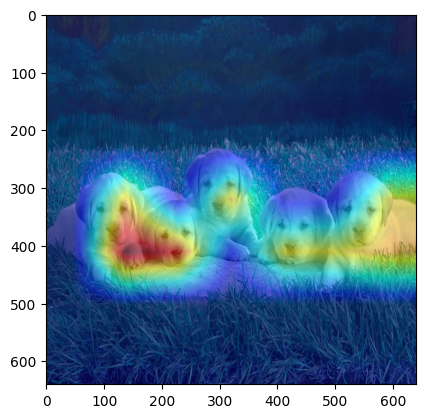

In [25]:
img = cv2.imread('YOLO-V8-CAM/images/puppies.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

model = YOLO('YOLO-V8-CAM/models/yolov8n-cls.pt') 
target_layers =[model.model.model[-2]]


cam = EigenCAM(model, target_layers,task='cls')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()
#might need to rerun

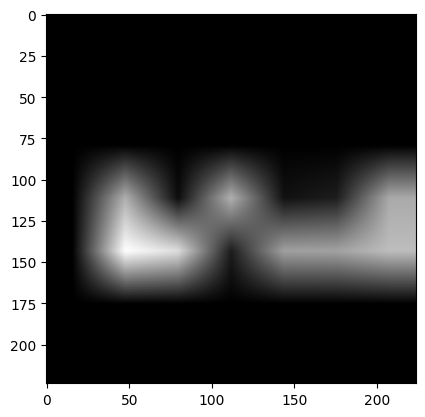

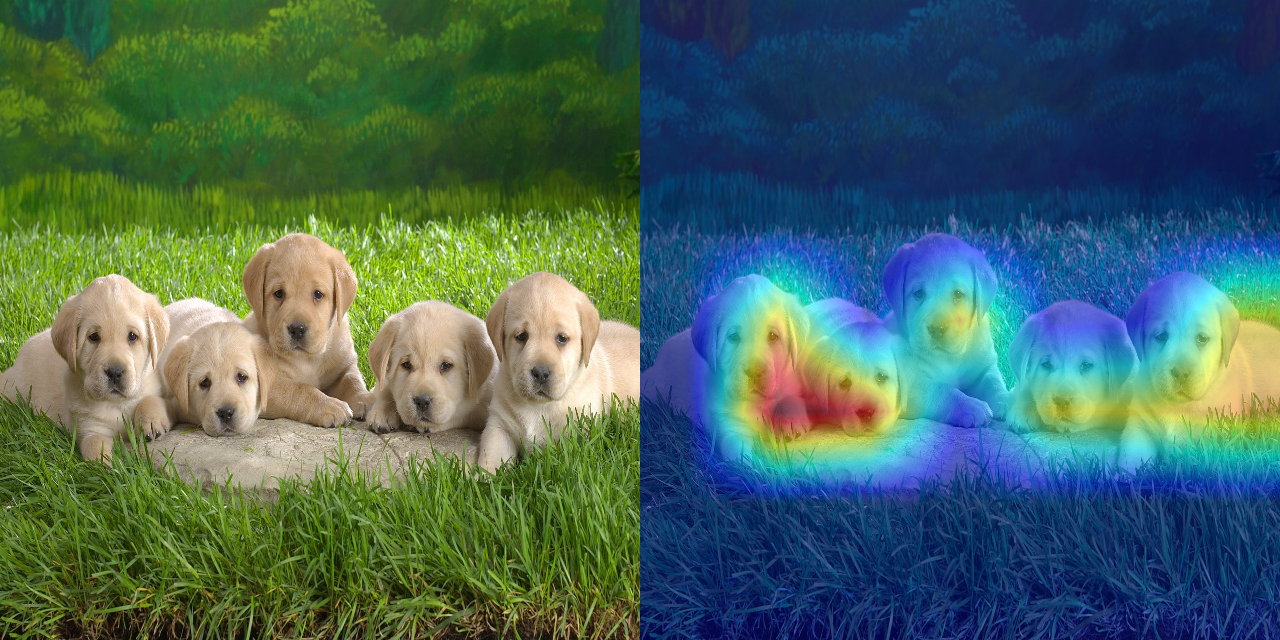

In [28]:
from PIL import Image
g_scale = cv2.resize(np.stack([grayscale_cam] * 3, axis=2), (224,224))

plt.imshow(g_scale, cmap='gray')
plt.show()
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))


0: 640x640 7 dogs, 77.7ms
Speed: 1.5ms preprocess, 77.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


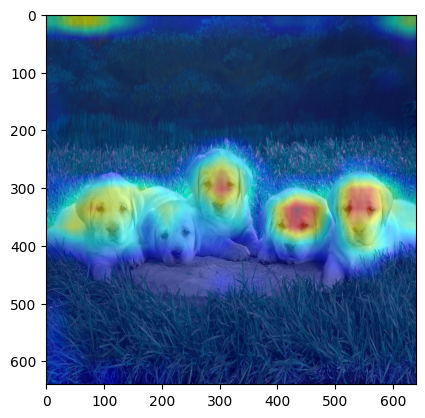

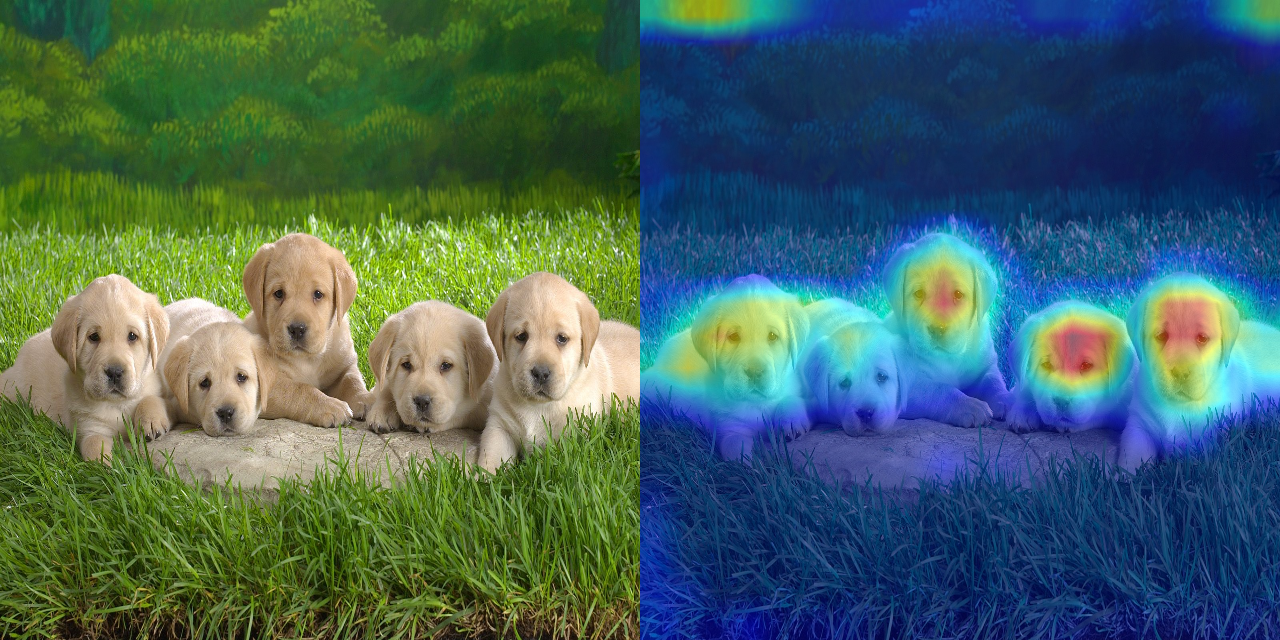

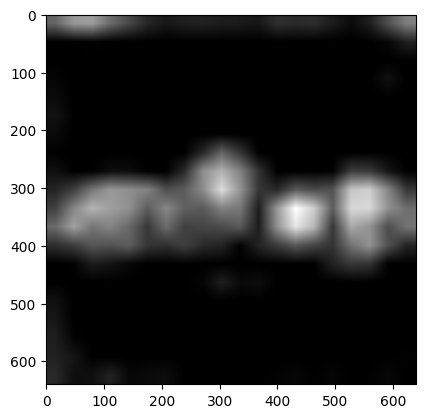

In [31]:
#for the object detection model
model = YOLO('YOLO-V8-CAM/models/yolov8n.pt')

img = cv2.imread('YOLO-V8-CAM/images/puppies.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

target_layers =[model.model.model[-4]]

cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

import matplotlib.pyplot as plt
g_scale = np.stack([grayscale_cam] * 3, axis=2)
plt.imshow(g_scale)

im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))

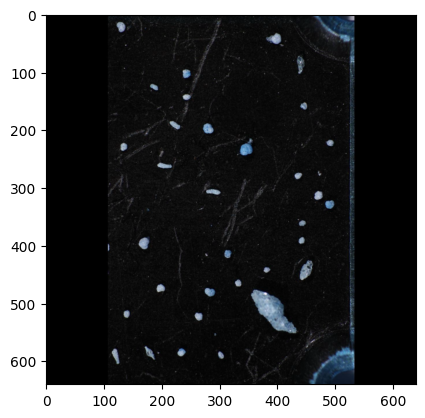

100%|██████████| 5.28M/5.28M [00:01<00:00, 3.16MB/s]

0: 224x224 safe 0.06, fountain 0.04, book_jacket 0.04, syringe 0.04, padlock 0.03, 7.3ms
Speed: 1.1ms preprocess, 7.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


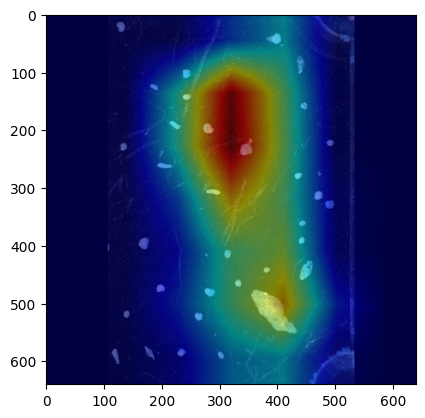

In [44]:

img = cv2.imread('samples/agglutinated.jpg')
img = cv2.resize(img, (640, 640))
#img = cv2.resize(img, (1280, 1280))
rgb_img = img.copy()
img = np.float32(img) / 255
plt.imshow(img)
plt.show()

#model = YOLO('forams4-1280-augmentedraw-bigtest-200epochs-yolov8x.pt') 
model = YOLO('forams4-rect-640.pt')
model1 = YOLO('models/yolov8n-cls.pt')

target_layers =[model.model.model[-2]]

cam = EigenCAM(model, target_layers,task='cls')

grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


(1280, 1280, 3)



0: 1280x1280 1 Sediment, 33 agglutinateds, 3262.8ms
Speed: 3.9ms preprocess, 3262.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1280, 1280)


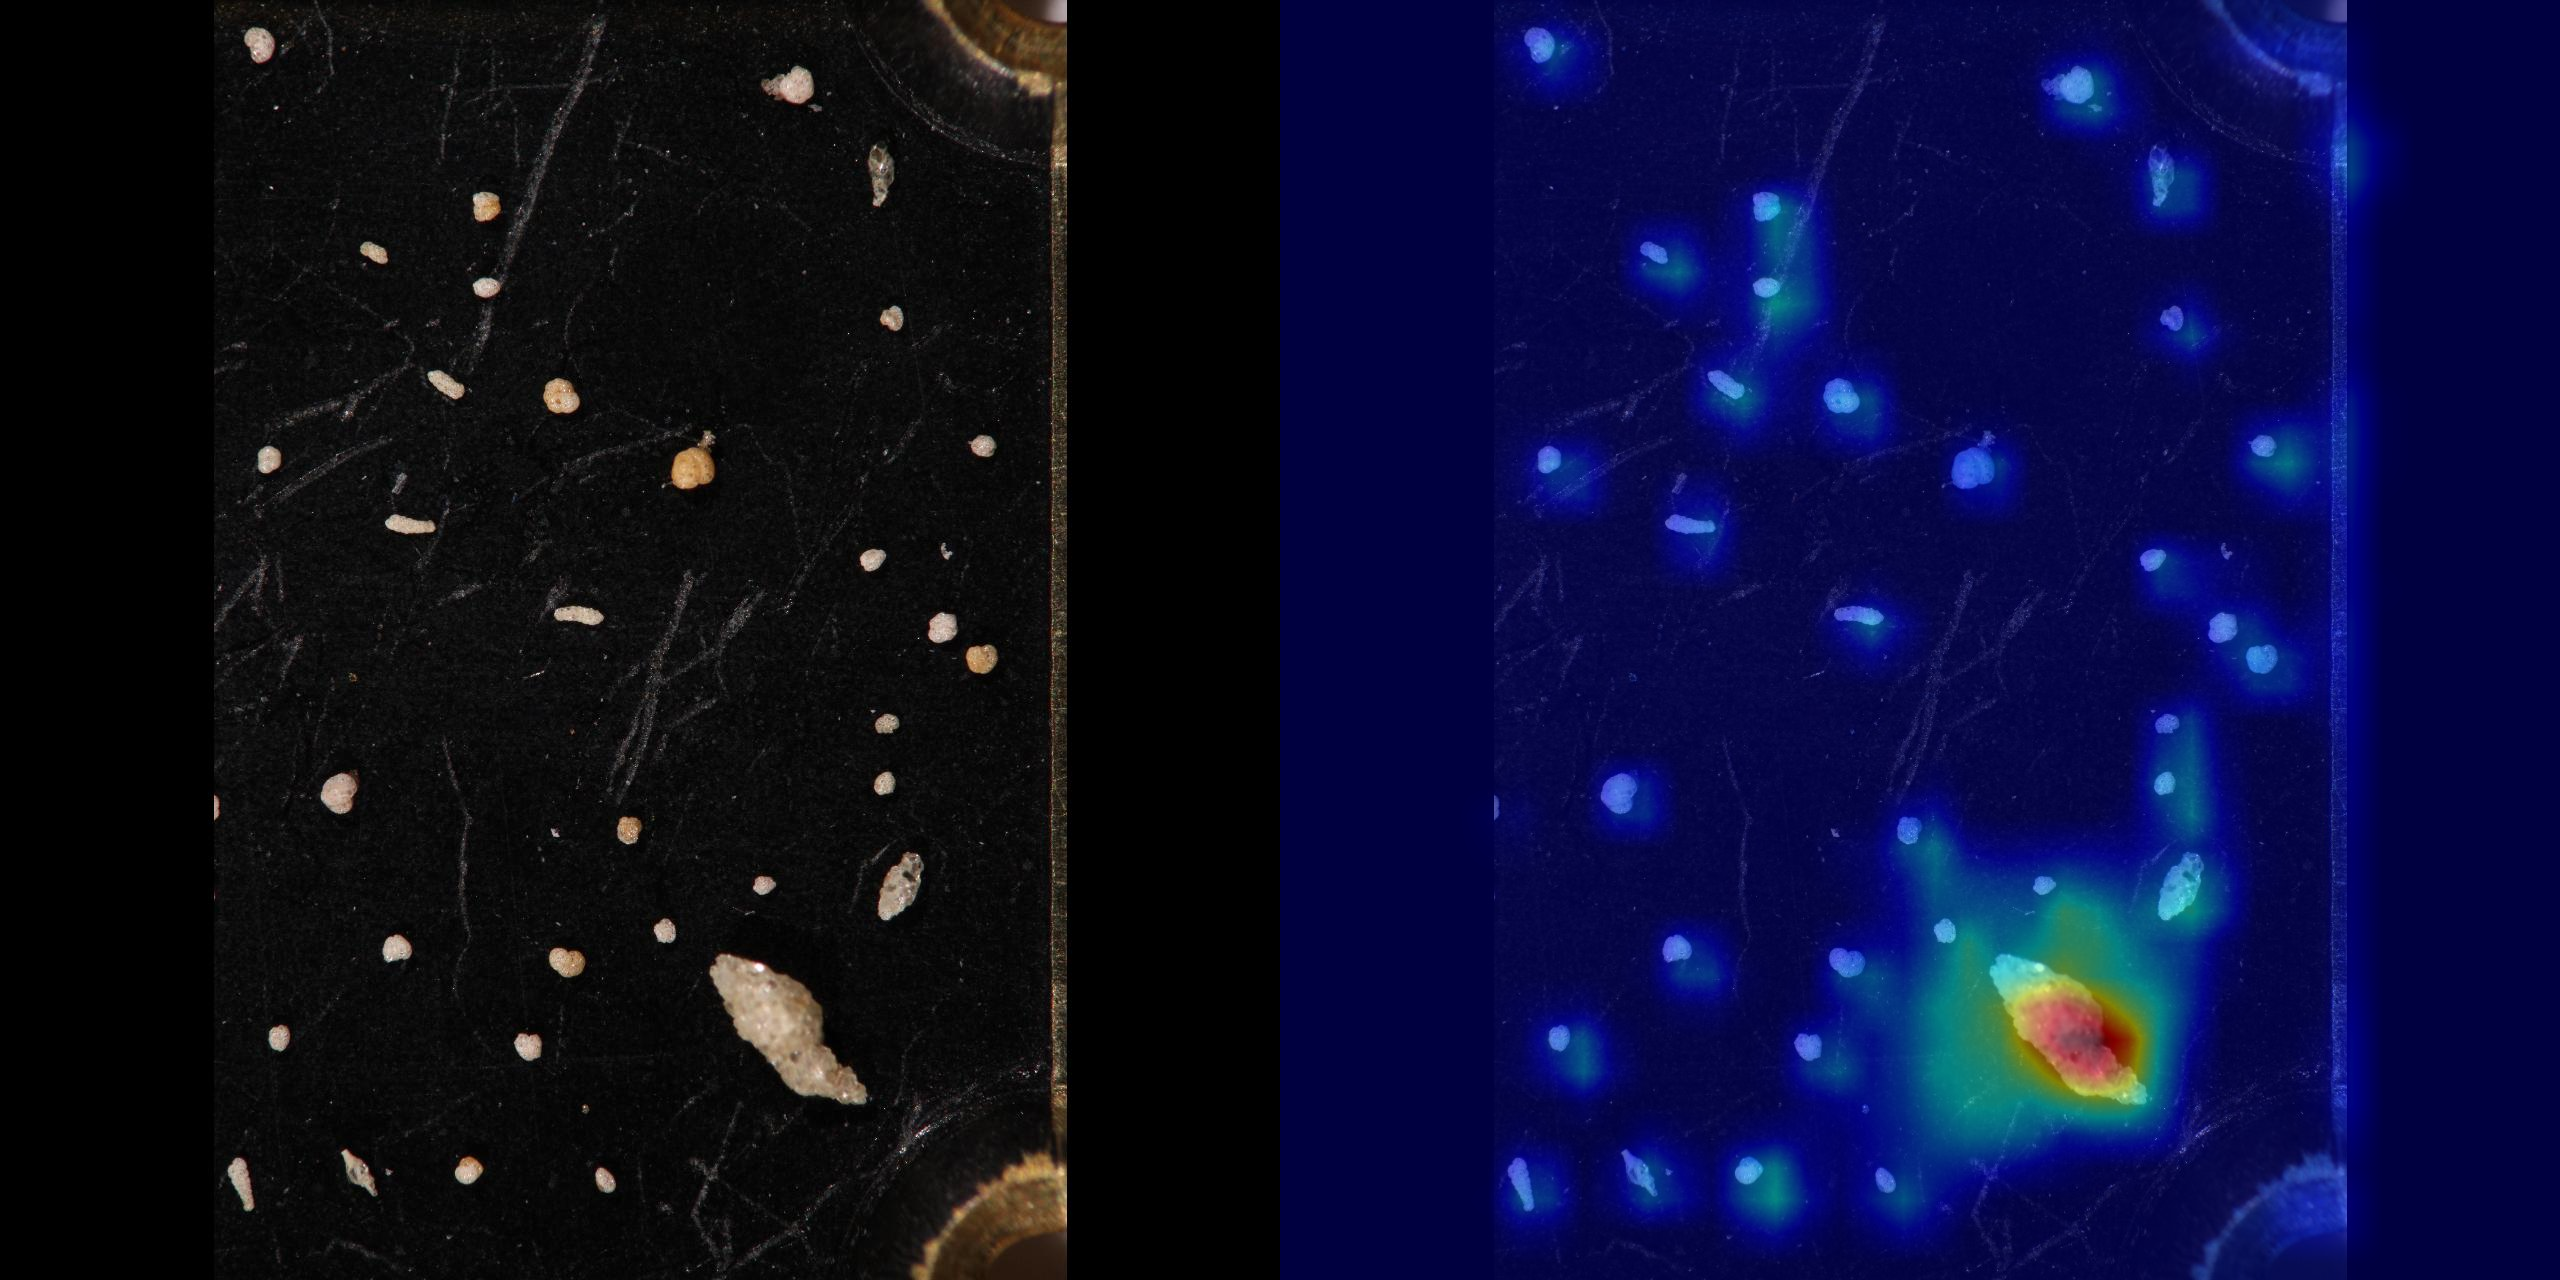

In [13]:

#model = YOLO('forams4-rect-640.pt')
model = YOLO('forams4-1280-augmentedraw-bigtest-200epochs-yolov8x.pt')
#model1 = YOLO('models/yolov8n-cls.pt')

#model = YOLO('YOLO-V8-CAM/models/yolov8n.pt')

img = cv2.imread('samples/agglutinated.jpg')
#img = cv2.resize(img, (640, 640))
#img = cv2.resize(img, (1280, 1280))
rgb_img = img.copy()
img = np.float32(img) / 255
print(img.shape)
#plt.imshow(img)
#plt.show()

target_layers =[model.model.model[-4]]

cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
#plt.imshow(cam_image)
#plt.show()

import matplotlib.pyplot as plt
g_scale = np.stack([grayscale_cam] * 3, axis=2)
#plt.imshow(g_scale)

im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))